In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import time

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
scaler = MinMaxScaler()
datos = load_wine()
X = torch.tensor(scaler.fit_transform(datos.data), dtype=torch.float32)#con fit

In [4]:
y = torch.tensor(LabelBinarizer().fit_transform(datos.target), dtype=torch.float32)#con  label bin

In [5]:
type(X), type(y), X.shape, y.shape

(torch.Tensor, torch.Tensor, torch.Size([178, 13]), torch.Size([178, 3]))

In [6]:
train_index, test_index = train_test_split(np.arange(datos.data.shape[0]), test_size=1/3, stratify=datos.target)
train_index.shape, test_index.shape

((118,), (60,))

In [7]:
class MLP(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(MLP,self).__init__()
        self.hidden_layer  = nn.Linear(input_dim,64)
        self.output_layer  = nn.Linear(64,output_dim)
        self.relu = nn.ReLU()
    
    
    def forward(self,x):
        out =  self.relu(self.hidden_layer(x))
        out =  self.output_layer(out)
        return out

In [8]:
model = MLP(input_dim=13, output_dim=3)

In [15]:
model(X[1]), y[1]

(tensor([ 0.0259,  0.1648, -0.3670], grad_fn=<AddBackward0>),
 tensor([1., 0., 0.]))

In [28]:
model(X[1]).reshape(1, -1), y[1:1].reshape(1, -1)

(tensor([[ 0.0259,  0.1648, -0.3670]], grad_fn=<ReshapeAliasBackward0>),
 tensor([], size=(1, 0)))

In [29]:
loss_fn(model(X[1]).reshape(1, -1), y[1].reshape(1,-1))

tensor(1.0382, grad_fn=<DivBackward1>)

In [10]:
loss_fn = torch.nn.CrossEntropyLoss()#loss con cross

In [11]:
optimizador = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)#con optim

In [12]:
aciertos_test = []
aciertos_train = []

In [30]:
batch = 1
for epochs in range(50):
    initial = time.time()
    for indx in train_index:
        optimizador.zero_grad()
        loss = loss_fn(model(X[indx]).reshape(batch, -1), y[indx].reshape(batch, -1))
        loss.backward()
        optimizador.step()
    final = time.time()
    aciertos_train.append((model(X[train_index]).argmax(axis=1) == y[train_index].argmax(axis=1)).numpy().mean())
    aciertos_test.append((model(X[test_index]).argmax(axis=1) == y[test_index].argmax(axis=1)).numpy().mean())
    print(f"{epochs}\t accuracy (train) = {aciertos_train[-1:]} \t\t (test) = {aciertos_test[-1:]} \t\t (elapsed) = {final - initial} seg.")

0	 accuracy (train) = [0.9067796610169492] 		 (test) = [0.85] 		 (elapsed) = 0.0617070198059082 seg.
1	 accuracy (train) = [0.9491525423728814] 		 (test) = [0.9166666666666666] 		 (elapsed) = 0.13030147552490234 seg.
2	 accuracy (train) = [0.9830508474576272] 		 (test) = [0.95] 		 (elapsed) = 0.04369497299194336 seg.
3	 accuracy (train) = [0.9830508474576272] 		 (test) = [0.9333333333333333] 		 (elapsed) = 0.051724910736083984 seg.
4	 accuracy (train) = [0.9915254237288136] 		 (test) = [0.95] 		 (elapsed) = 0.0642848014831543 seg.
5	 accuracy (train) = [1.0] 		 (test) = [0.9666666666666667] 		 (elapsed) = 0.04277491569519043 seg.
6	 accuracy (train) = [1.0] 		 (test) = [0.9833333333333333] 		 (elapsed) = 0.04589653015136719 seg.
7	 accuracy (train) = [1.0] 		 (test) = [0.9833333333333333] 		 (elapsed) = 0.050908803939819336 seg.
8	 accuracy (train) = [1.0] 		 (test) = [0.9833333333333333] 		 (elapsed) = 0.04529833793640137 seg.
9	 accuracy (train) = [1.0] 		 (test) = [0.983333333333333

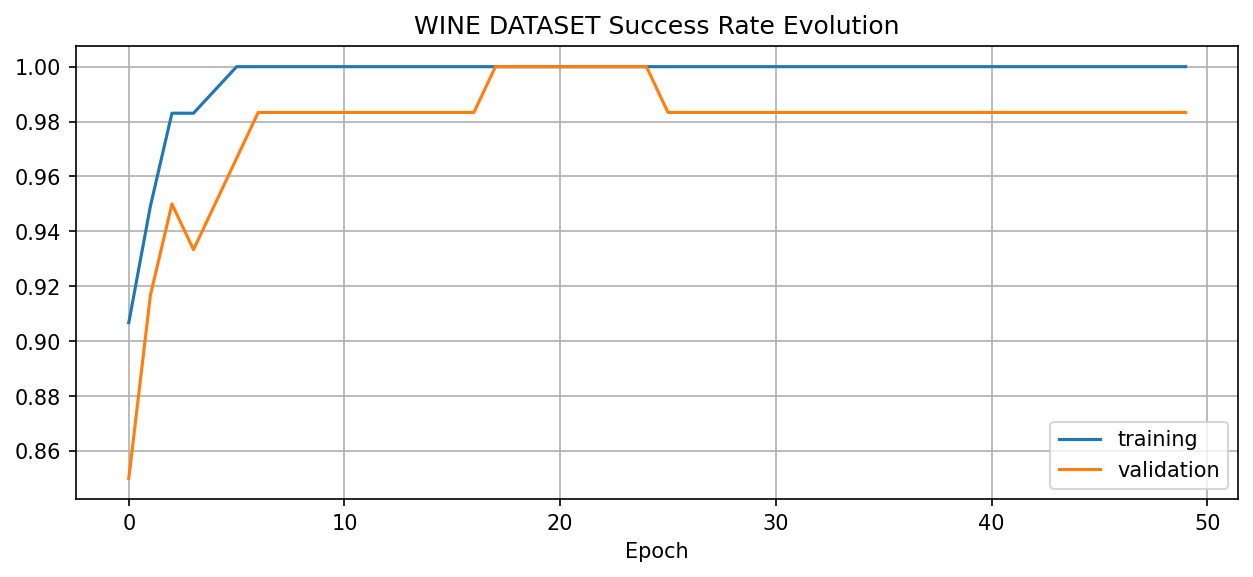

In [31]:
plt.figure(figsize=(10,4), dpi=150)
plt.plot(np.arange(len(aciertos_train), dtype=int), aciertos_train, label='training')
plt.plot(np.arange(len(aciertos_test), dtype=int), aciertos_test, label='validation')
plt.legend()
plt.title('WINE DATASET Success Rate Evolution')
plt.xlabel('Epoch')
# plt.xticks(history.epoch)
plt.grid()
plt.savefig("WINE MLP Pytorch.jpg", dpi=150)
plt.show()